# Sympy functions - basics

In [1]:
import sympy as sp

In [2]:
#create some variables for the functions
x = sp.Symbol('x') #one variable
a,b,c = sp.symbols('a b c') #many variables, this is good for coefficients!


#create the expression
g = a*x**2 +b*x +c #******expressions are not functions*****


#create the function
f = sp.lambdify(x,g) #first the variable, then the expression

In [3]:
##as an aside, you can create a expression made up of other expressions.
h = sp.Function('h')
j = sp.Function('j')
j = x**3 +1
h = x**2
N = h/j
sp.pprint(N)
#substitute x with x-2 in j in N
N = sp.simplify(N.subs(j,j.subs(x, x-2))).doit() #adjust an expression
sp.pprint(N)

   2  
  x   
──────
 3    
x  + 1
      2     
     x      
────────────
       3    
(x - 2)  + 1


In [4]:
#use the pretty print function for nice viewing
sp.pprint(g)

   2          
a⋅x  + b⋅x + c


In [5]:
print(g)

a*x**2 + b*x + c


In [6]:
## you can differentiate an EXPRESSION

fp = sp.diff(g, x) #EXPRESSION, then variable
sp.pprint(fp)

2⋅a⋅x + b


In [8]:
# integrate an EXPRESSION

gp = sp.integrate(fp,x) #doesnt add an arbitrary constant
sp.pprint(gp)

   2      
a⋅x  + b⋅x


## solving functions


Sympy can:

 * Factor polynomials.
 * Find roots of polynomials, symbolically as well as numerically. 
 * Solve (symbolically as well as numerically) simultaneous polynomial equations.
 * Solve simultaneous equations that are not polynomial

In [9]:
# the solve function will find the roots of the expression with respect to a given variable

p = x**2 -2
sp.pprint(sp.solve(p,x))

p = x**2 +2 #even with complex roots
sp.pprint(sp.solve(p,x))

[-√2, √2]
[-√2⋅ⅈ, √2⋅ⅈ]


In [10]:
#we can also find the roots numerically
import mpmath as mp
mp.mp.pretty = True

In [11]:
p = x**3 + x**2 -x - 1

#find the coefficients:
R = sp.Poly(p,x).coeffs()
print(R)

#solve numerically using mpmath and the coefficients.
mp.polyroots(R)

[1, 1, -1, -1]


[1.0, (-1.0 - 1.25049450131375e-10j), (-1.0 + 1.2799322008877e-10j)]

In [12]:
## lets solve SYSTEMS OF EQUATIONS
y = sp.Symbol("y")
sol = sp.solve([x**2 + y**2 - 4, x*y-1 ]) #these are two equations now instead of an expression and a variable
print(type(sol))
print(len(sol))

<class 'list'>
4


In [13]:
for i in sol:
    sp.pprint(i)
    
print(type(sol[0])) #the solutions are saved as dictionaries!
#each solution has keys x and y

⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫
⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬
⎩                                                                      ⎭
⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭
⎧   ⎛       ________⎞   ________ ⎛    ________    ⎞        ________⎫
⎨x: ⎝-2 - ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬
⎩                                                                  ⎭
⎧    ⎛       ________⎞   ________ ⎛  ________    ⎞       ________⎫
⎨x: -⎝-2 + ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬
⎩                                                                ⎭
<class 'dict'>


In [14]:
#to access the solutions:
for i in range(len(sol)):
    print("x:",sol[i][x].evalf(10), "\t\ty:", sol[i][y].evalf(10))

    

x: -1.931851653 		y: -0.5176380902
x: 1.931851653 		y: 0.5176380902
x: -0.5176380902 		y: -1.931851653
x: 0.5176380902 		y: 1.931851653


### for complex numbers:
use sp.complex(<value>) to get a floating point approximation and sp.pprint(<value>) to get a close form expression.

# matplotlib - visualize the solution

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

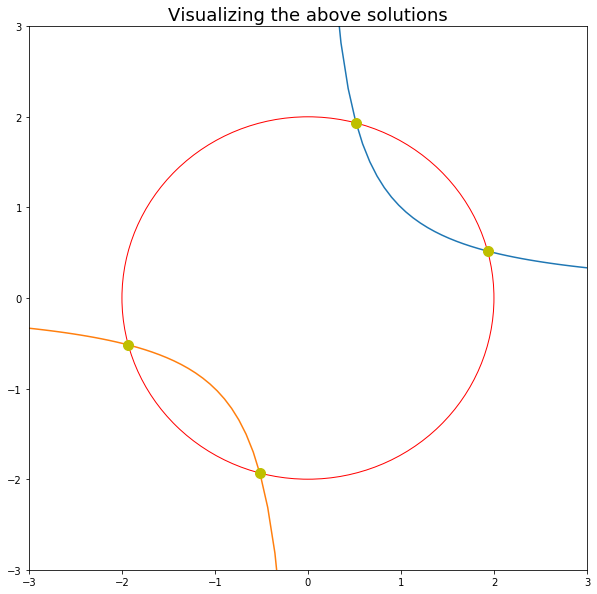

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) # creating subplots

circle = plt.Circle( (0,0), 2, color='r', fill=False) # creating the circle

#when we solve the problem above by hand, we get that y = +-1/x.
#this part is for y = +1/x
x1 = np.linspace(0.2, 4)
y1 = x1**(-1)
ax.plot(x1, y1,'-') # PLOTTING
#this part is for y = -1/x
x2 = np.linspace(-4,-0.2)
y2 = x2**(-1)
ax.plot(x2, y2,'-')# PLOTTING

ax.set_title('Visualizing the above solutions', fontsize=18)

## the roots we found with sympy, yellow dots.
# how to plot each point of an array in x and y
ax.plot([sol[i][x].evalf(10) for i in range(len(sol))], [sol[i][y].evalf(10) for i in range(len(sol))],\
        'yo', markersize=10) # PLOTTING

fig.gca().add_artist(circle) # PLOTTING
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.show()